# Generate and Plot Data

(2000, 2)
(2000,)


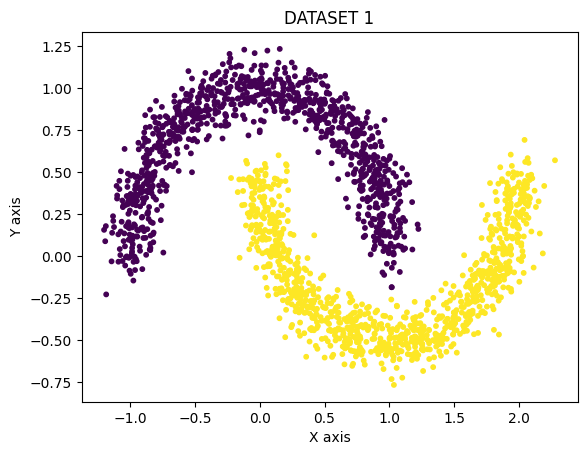

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(10)

from sklearn import datasets
X, Y = datasets.make_moons(n_samples=2000, noise=.09, random_state=10)
print(X.shape)
print(Y.shape)
plt.scatter(X[:, 0], X[:, 1], s=10, c=Y, cmap='viridis')
plt.title('DATASET 1')
plt.xlabel('X axis')
plt.ylabel('Y axis')

plt.show()

# Train and Evaluate models

In [2]:
from sklearn.cluster import Birch, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score

In [3]:
models = [Birch(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN(eps=0.2, min_samples=70)]

In [4]:
def evaluate_model(model):
    predicted_labels = model.fit_predict(X)
    
    return {
        'predicted_labels': predicted_labels,
        'silhouette':  silhouette_score(X, predicted_labels),
        'ari': adjusted_rand_score(Y, predicted_labels),
        'nmi': normalized_mutual_info_score(Y, predicted_labels)
    }

In [5]:
results = {}
for model in models:
    model_name = model.__class__.__name__
    results[model_name] = evaluate_model(model)

# Show results and Visualize clusters

Model: Birch
Silhouette Score: 0.4583503187056948
Adjusted Rand Index (ARI): 0.3767076067566142
Normalized Mutual Information (NMI): 0.341366173543779


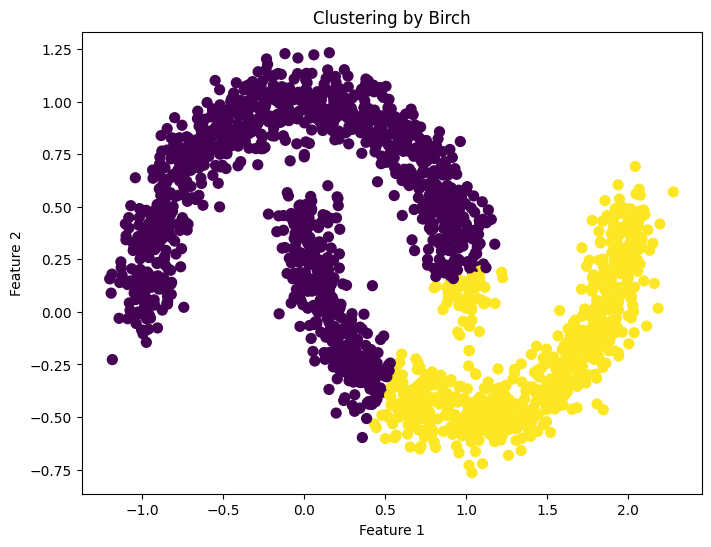

Model: AgglomerativeClustering
Silhouette Score: 0.4062161591537881
Adjusted Rand Index (ARI): 0.7155769186783432
Normalized Mutual Information (NMI): 0.6713586477684496


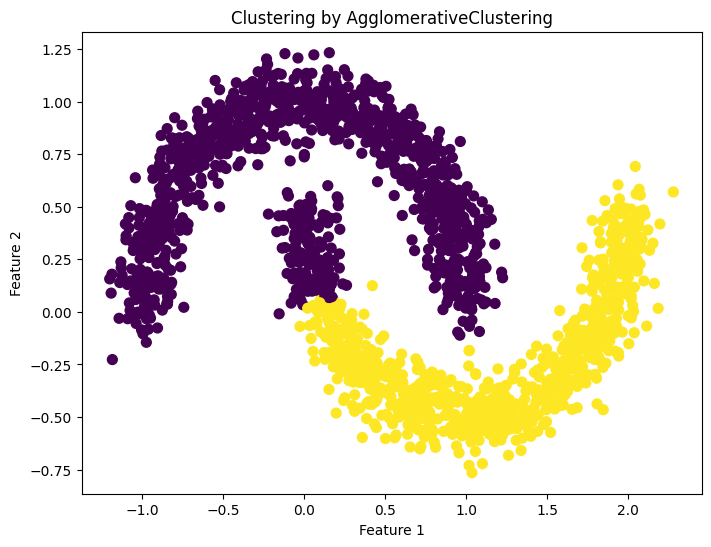

Model: DBSCAN
Silhouette Score: 0.3010813290557993
Adjusted Rand Index (ARI): 0.9920149895714532
Normalized Mutual Information (NMI): 0.9787649300611727


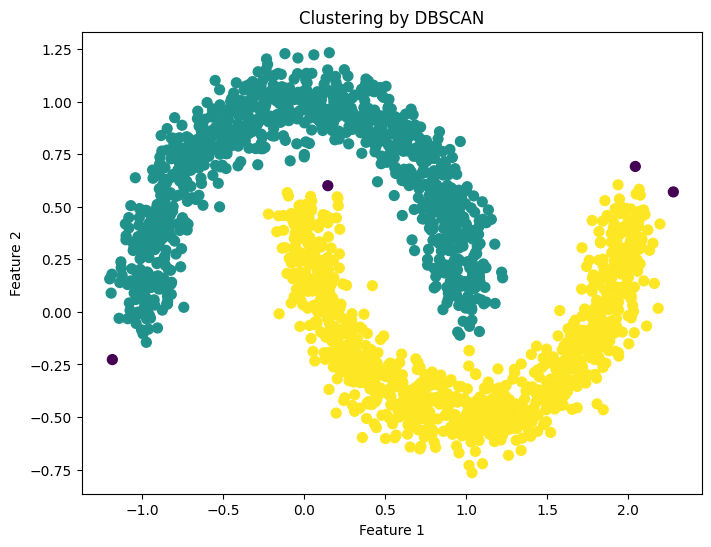

In [6]:
for model in models:
    model_name = model.__class__.__name__
    # Display evaluation results
    print(f"Model: {model_name}")
    print(f"Silhouette Score: {results[model_name]['silhouette']}")
    print(f"Adjusted Rand Index (ARI): {results[model_name]['ari']}")
    print(f"Normalized Mutual Information (NMI): {results[model_name]['nmi']}")
    print("\n")

    # Visualize clusters
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=results[model_name]['predicted_labels'], cmap='viridis', s=50)
    plt.title(f"Clustering by {model_name}")
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()